# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


### Google Play Store Apps

In [567]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 14,6

In [568]:
# ссылка https://github.com/Abdulgniev/pyda-19/blob/main/3_Lesson_02/co-emissions-per-capita.csv
CO2 = pd.read_csv('co-emissions-per-capita.csv')

In [417]:
#CO2['Entity'].unique()

In [418]:
#CO2.groupby(['Entity']).max('Per capita CO2 emissions').sort_values('Per capita CO2 emissions', ascending=False).head(5)

In [569]:
#CO2_max_Entity = CO2.groupby(['Entity']).max('Per capita CO2 emissions').sort_values('Per capita CO2 emissions', ascending=False).head(5).reset_index()['Entity']
CO2_max_Entity = ['Russia', 'China', 'Germany', 'France', 'United Kingdom', 'United States']
year = list(range(2000,2020))
CO2_plot = CO2[CO2['Year'].isin(year)]
CO2_plot = CO2_plot[CO2_plot['Entity'].isin(CO2_max_Entity)]
CO2_pivot = pd.pivot_table(data=CO2_plot, index = ['Year'], columns = ['Entity'],  values = 'Per capita CO2 emissions')

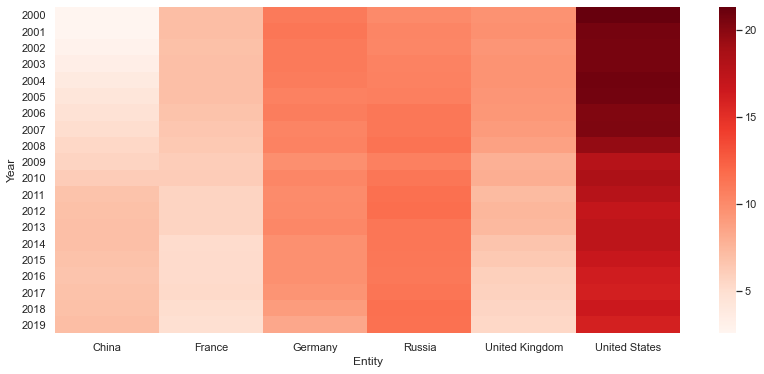

In [570]:
sns.heatmap(CO2_pivot, cmap='Reds')
plt.rcParams['figure.figsize']=(15,10)
sns.set(font_scale=2)
plt.show()

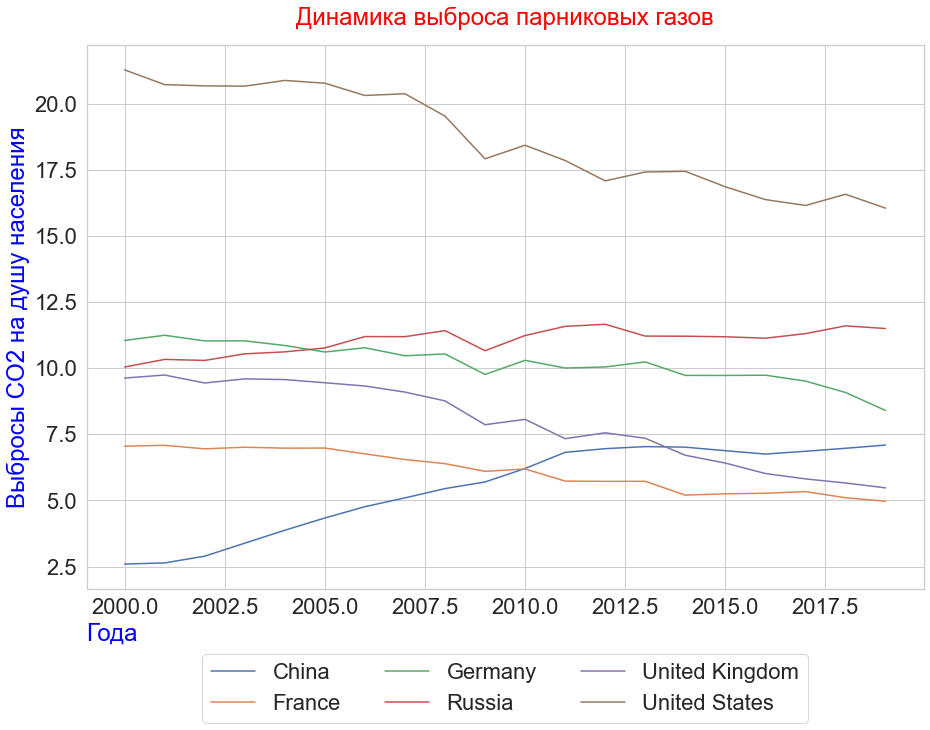

In [571]:
sns.set_style("whitegrid")
ax = sns.lineplot(data=CO2_plot, x="Year", y="Per capita CO2 emissions", hue="Entity")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), shadow=False, ncol=3)
ax.set_title('Динамика выброса парниковых газов', loc = 'center', pad = 20, fontsize=24, color='red')
ax.set_xlabel('Года', loc = 'left', color='blue')
ax.set_ylabel('Выбросы CO2 на душу населения', color='blue')
plt.rcParams['figure.figsize']=(17,10)
sns.set(font_scale=2)

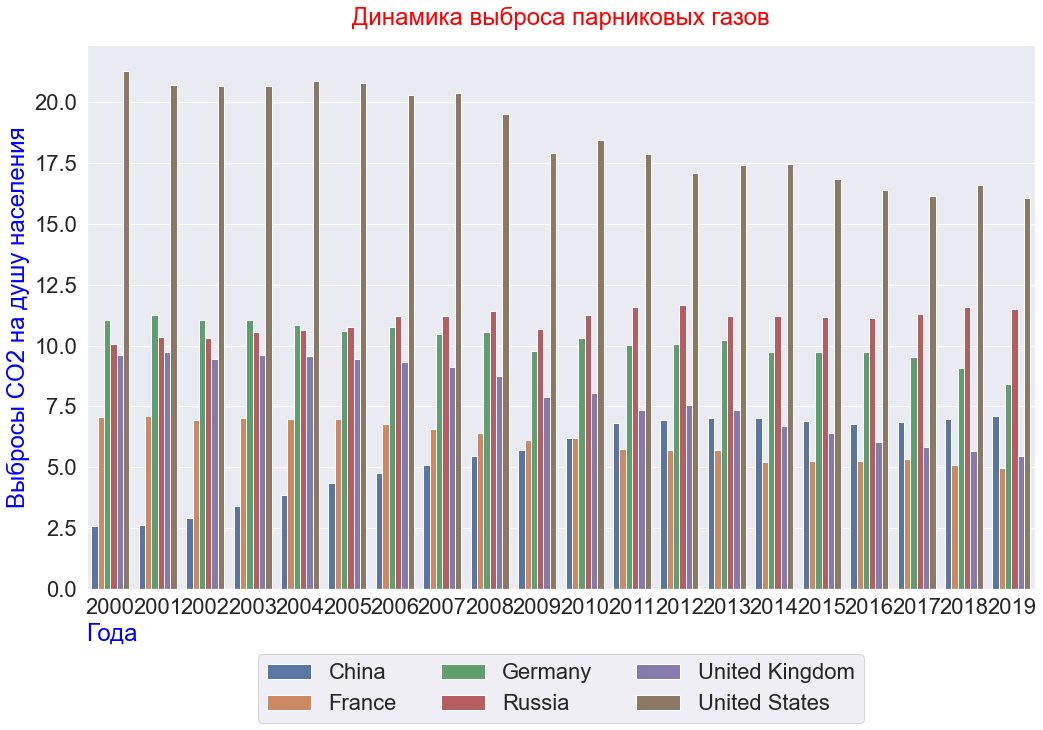

In [572]:
ax = sns.barplot(x="Year", y="Per capita CO2 emissions", hue="Entity", data=CO2_plot)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), shadow=False, ncol=3)
ax.set_title('Динамика выброса парниковых газов', loc = 'center', pad = 20, fontsize=24, color='red')
ax.set_xlabel('Года', loc = 'left', color='blue')
ax.set_ylabel('Выбросы CO2 на душу населения', color='blue')
plt.rcParams['figure.figsize']=(17,10)
sns.set(font_scale=1)

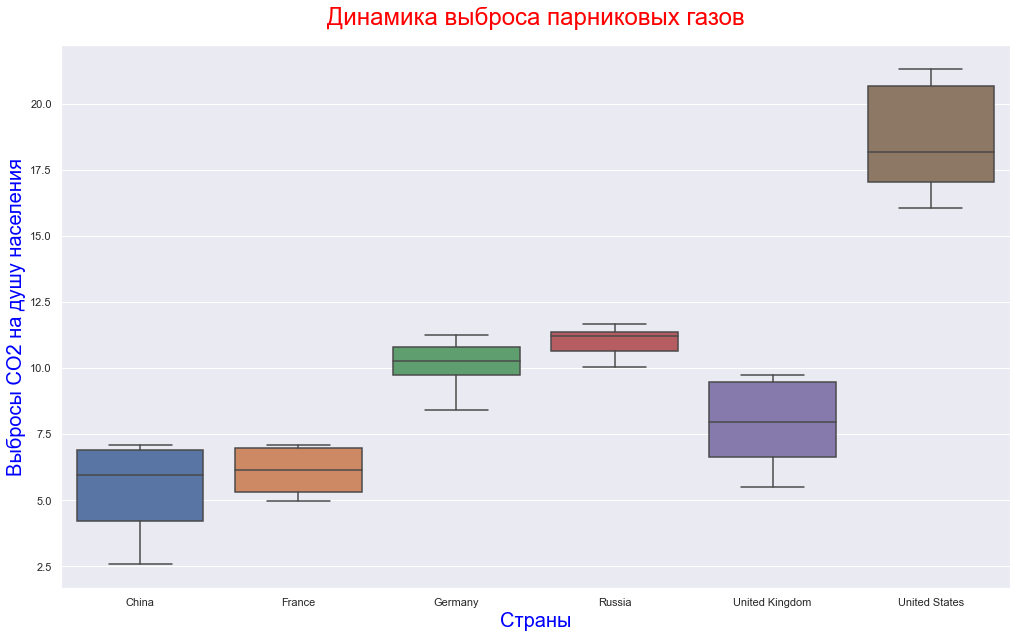

In [573]:
ax = sns.boxplot(x="Entity", y="Per capita CO2 emissions", data=CO2_plot)
ax.set_title('Динамика выброса парниковых газов', loc = 'center', pad = 20, fontsize=24, color='red')
ax.set_xlabel('Страны', fontsize=20, color='blue')
ax.set_ylabel('Выбросы CO2 на душу населения', fontsize=20, color='blue')
plt.rcParams['figure.figsize']=(17,10)
sns.set(font_scale=1)

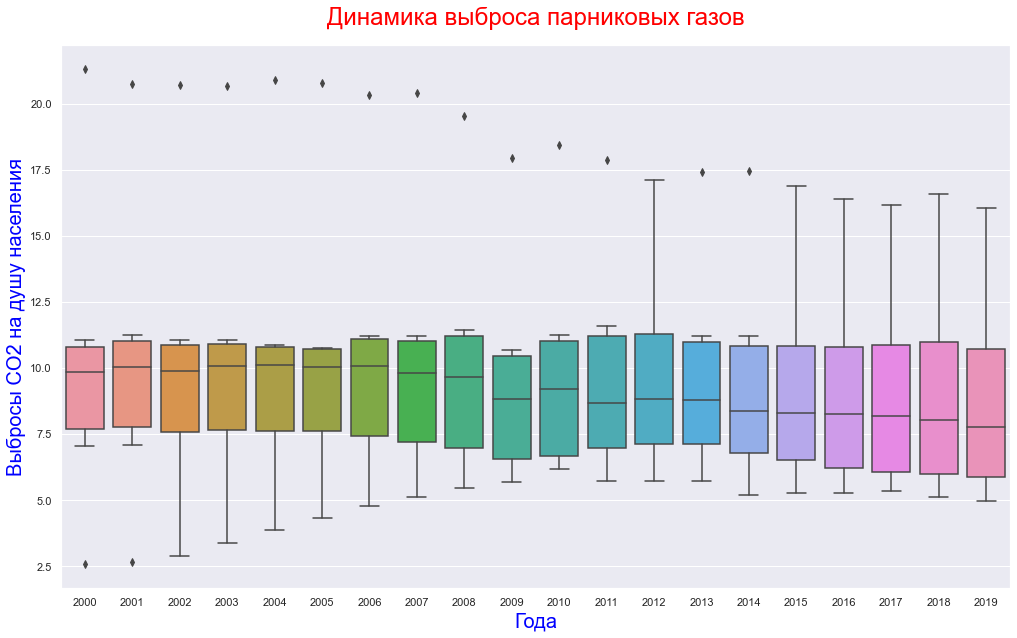

In [574]:
ax = sns.boxplot(x="Year", y="Per capita CO2 emissions", data=CO2_plot)
ax.set_title('Динамика выброса парниковых газов', loc = 'center', pad = 20, fontsize=24, color='red')
ax.set_xlabel('Года', fontsize=20, color='blue')
ax.set_ylabel('Выбросы CO2 на душу населения', fontsize=20, color='blue')
plt.rcParams['figure.figsize']=(17,10)
sns.set(font_scale=1)

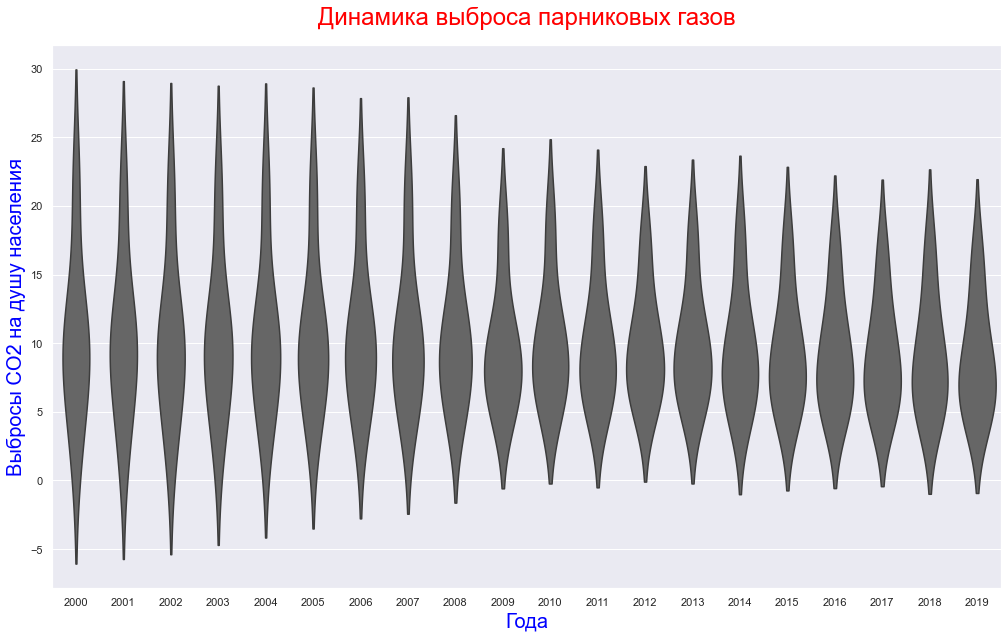

In [575]:
ax = sns.violinplot(x="Year", y="Per capita CO2 emissions", data=CO2_plot, inner=None, color="0.4")
ax.set_title('Динамика выброса парниковых газов', loc = 'center', pad = 20, fontsize=24, color='red')
ax.set_xlabel('Года', fontsize=20, color='blue')
ax.set_ylabel('Выбросы CO2 на душу населения', fontsize=20, color='blue')
plt.rcParams['figure.figsize']=(17,10)
sns.set(font_scale=1)

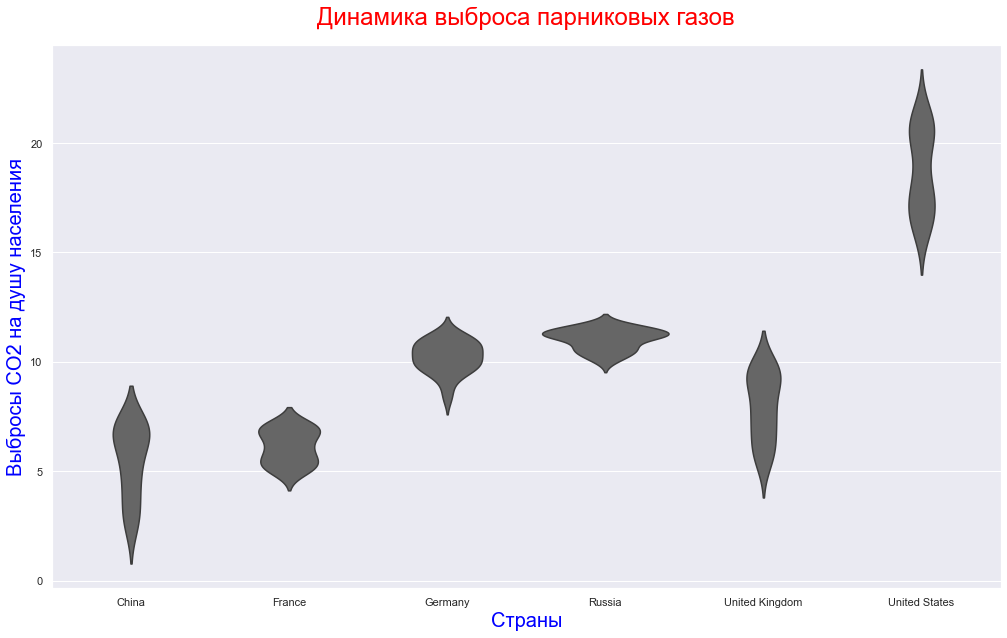

In [576]:
ax = sns.violinplot(x="Entity", y="Per capita CO2 emissions", data=CO2_plot, inner=None, color="0.4")
ax.set_title('Динамика выброса парниковых газов', loc = 'center', pad = 20, fontsize=24, color='red')
ax.set_xlabel('Страны', fontsize=20, color='blue')
ax.set_ylabel('Выбросы CO2 на душу населения', fontsize=20, color='blue')
plt.rcParams['figure.figsize']=(17,10)
sns.set(font_scale=1)

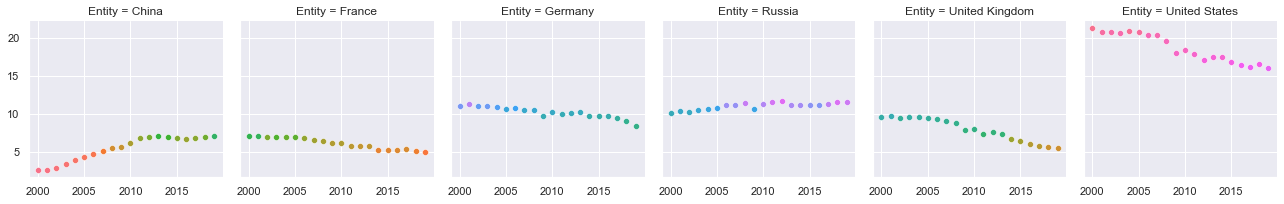

In [577]:
ax = sns.FacetGrid(CO2_plot, col="Entity", hue="Per capita CO2 emissions")
ax.map_dataframe(sns.scatterplot, x="Year", y="Per capita CO2 emissions")

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
